In [253]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import tensorflow as tf
from sklearn import preprocessing

In [254]:
X = np.random.uniform(0,1,20)
X


array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215])

In [255]:
mean = 0
s_d = 1
N = np.random.normal(mean, s_d, 20)
N

array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
        0.6536186 ,  0.8644362 , -0.74216502,  2.26975462, -1.45436567,
        0.04575852, -0.18718385,  1.53277921,  1.46935877,  0.15494743,
        0.37816252, -0.88778575, -1.98079647, -0.34791215,  0.15634897])

[-1.52510463e-01 -9.96691450e-01 -5.70435983e-01 -3.63695766e-01
  2.06206129e-01 -7.28223903e-01  4.68620742e-01 -7.03017528e-01
  6.40244190e-04  5.23188732e-01 -9.61254986e-01 -1.99274801e-01
 -2.61352460e-01 -3.03711245e-01  4.47155165e-01  5.58327450e-01
  3.79159515e-02 -1.06633783e+00 -1.01918269e+00 -7.13281477e-01]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


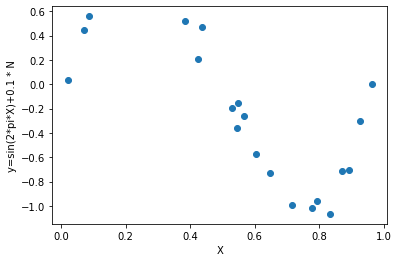

In [256]:
y=np.sin(2*np.pi*X)+(0.1 * N)
print(y)
print(X)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1 * N')
plt.show()


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

d= {"X_train":X_train, "Y_train":y_train, "X_test":X_test, "y_test":y_test}
df = pd.DataFrame(d)
df

[0.38344152 0.64589411 0.87001215 0.5488135  0.83261985 0.60276338
 0.07103606 0.52889492 0.43758721 0.54488318]
[0.71518937 0.0871293  0.0202184  0.92559664 0.56804456 0.891773
 0.96366276 0.77815675 0.79172504 0.4236548 ]
[ 0.52318873 -0.7282239  -0.71328148 -0.15251046 -1.06633783 -0.57043598
  0.44715516 -0.1992748   0.46862074 -0.36369577]
[-9.96691450e-01  5.58327450e-01  3.79159515e-02 -3.03711245e-01
 -2.61352460e-01 -7.03017528e-01  6.40244190e-04 -1.01918269e+00
 -9.61254986e-01  2.06206129e-01]


,X_train,Y_train,X_test,y_test
0,0.383442,0.523189,0.715189,-0.996691
1,0.645894,-0.728224,0.087129,0.558327
2,0.870012,-0.713281,0.020218,0.037916
3,0.548814,-0.152510,0.925597,-0.303711
4,0.832620,-1.066338,0.568045,-0.261352
5,0.602763,-0.570436,0.891773,-0.703018
6,0.071036,0.447155,0.963663,0.000640
7,0.528895,-0.199275,0.778157,-1.019183
8,0.437587,0.468621,0.791725,-0.961255
9,0.544883,-0.363696,0.423655,0.206206


In [258]:
x = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

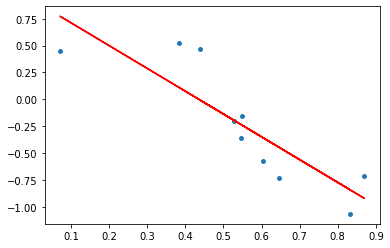

In [259]:
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='r')
plt.show()

RMSE: 0.5325008881280809
R2: 0.0
weights:
[[0.]]


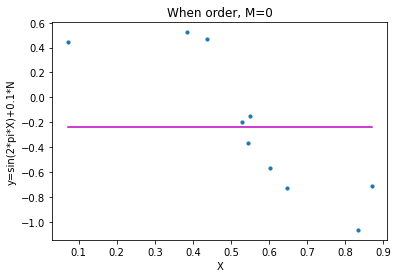

In [260]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=0)
x_polynomial = polynomial_features.fit_transform(x)

model_0 = LinearRegression()
model_0.fit(x_polynomial, y)
y_polynomial_pred = model_0.predict(x_polynomial)

rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
r2 = r2_score(y,y_polynomial_pred)
print("RMSE:",rmse)
print("R2:",r2)
print('weights:')
print(model_0.coef_)
plt.scatter(x, y, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polynomial_pred), key=sorted_axis)
x, y_polynomial_pred = zip(*sorted_zip)
plt.plot(x, y_polynomial_pred, color='m')
plt.title('When order, M=0')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 0.5323508034194481
R2: 0.0005636180573022065
[[ 0.         -0.05866312]]


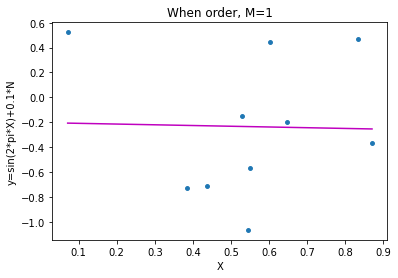

In [261]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=1)
x_polynomial = polynomial_features.fit_transform(x)

model_1 = LinearRegression()
model_1.fit(x_polynomial, y)
y_polynomial_pred = model_1.predict(x_polynomial)

rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
r2 = r2_score(y,y_polynomial_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model_1.coef_)
plt.scatter(x, y, s=15)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polynomial_pred), key=sorted_axis)
x, y_polynomial_pred = zip(*sorted_zip)
plt.plot(x, y_polynomial_pred, color='m')
plt.title('When order, M=1')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 0.35697114812880076
R2: 0.5506077699379928
[[  0.         -19.45948587  43.27697646 -26.73303637]]


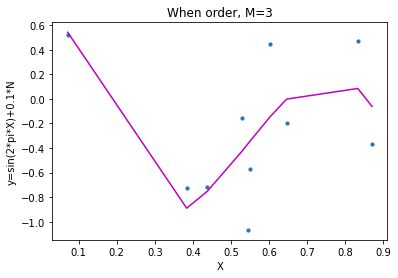

In [262]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=3)
x_polynomial = polynomial_features.fit_transform(x)

model_3 = LinearRegression()
model_3.fit(x_polynomial, y)
y_polynomial_pred = model_3.predict(x_polynomial)

rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
r2 = r2_score(y,y_polynomial_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model_3.coef_)

plt.scatter(x, y, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polynomial_pred), key=sorted_axis)
x, y_polynomial_pred = zip(*sorted_zip)
plt.plot(x, y_polynomial_pred, color='m')
plt.title('When order, M=3')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

RMSE: 5.647469002115894e-07
R2: 0.9999999999988752
[[ 0.00000000e+00  5.32603583e+07 -5.39473104e+08  2.87072000e+09
  -9.20307827e+09  1.87862446e+10 -2.46769972e+10  2.02440602e+10
  -9.45132725e+09  1.91887549e+09]]


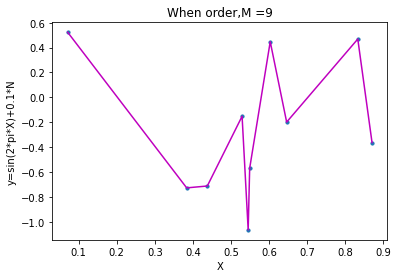

In [263]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x_polynomial = polynomial_features.fit_transform(x)

model_9 = LinearRegression()
model_9.fit(x_polynomial, y)
y_polynomial_pred = model_9.predict(x_polynomial)

rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
r2 = r2_score(y,y_polynomial_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model_9.coef_)

plt.scatter(x, y, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_polynomial_pred), key=sorted_axis)
x, y_polynomial_pred = zip(*sorted_zip)
plt.plot(x, y_polynomial_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1*N')
plt.show()

In [264]:
print(model_0.coef_)
print(model_1.coef_)
print(model_3.coef_)
print(model_9.coef_)

[[0.]]
[[ 0.         -0.05866312]]
[[  0.         -19.45948587  43.27697646 -26.73303637]]
[[ 0.00000000e+00  5.32603583e+07 -5.39473104e+08  2.87072000e+09
  -9.20307827e+09  1.87862446e+10 -2.46769972e+10  2.02440602e+10
  -9.45132725e+09  1.91887549e+09]]


In [265]:
data = {'M=0':[model_0.coef_[0][0],"","","","","","","","","" ],'M=1':[model_1.coef_[0][0],model_1.coef_[0][1],"","","","","","","",""],'M=3':[model_3.coef_[0][0],model_3.coef_[0][1],model_3.coef_[0][2],model_3.coef_[0][3],"","","","","",""],'M=9':[ model_9.coef_[0][0],model_9.coef_[0][1],model_9.coef_[0][2],model_9.coef_[0][3],model_9.coef_[0][4], model_9.coef_[0][5],model_9.coef_[0][6],model_9.coef_[0][7],model_9.coef_[0][8],model_9.coef_[0][9]]}
print(data)

df.w = pd.DataFrame(data, index =['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

df.w

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, -0.058663119012439965, '', '', '', '', '', '', '', ''], 'M=3': [0.0, -19.459485871833188, 43.276976460046825, -26.73303637257064, '', '', '', '', '', ''], 'M=9': [0.0, 53260358.267673284, -539473103.5027283, 2870720000.2724895, -9203078268.744234, 18786244612.847973, -24676997220.02967, 20244060218.318005, -9451327253.9391, 1918875486.0469925]}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,M=0,M=1,M=3,M=9
w0,0,0,0,0.000000e+00
w1,,-0.0586631,-19.4595,5.326036e+07
w2,,,43.277,-5.394731e+08
w3,,,-26.733,2.870720e+09
w4,,,,-9.203078e+09
w5,,,,1.878624e+10
w6,,,,-2.467700e+10
w7,,,,2.024406e+10
w8,,,,-9.451327e+09
w9,,,,1.918875e+09


In [266]:
train_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_polynomial = polynomial_features.fit_transform(x)

    model_0 = LinearRegression()
    model_0.fit(x_polynomial, y)
    y_polynomial_pred = model_0.predict(x_polynomial)

    rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
    r2 = r2_score(y,y_polynomial_pred)
    print("RMSE:",rmse)
    train_rmse.append(rmse)


RMSE: 0.5325008881280809
RMSE: 0.5323508034194481
RMSE: 0.4370375597999003
RMSE: 0.35697114812880076
RMSE: 0.3205387538750368
RMSE: 0.31600271284515263
RMSE: 0.31438379979870323
RMSE: 0.2750090181625763
RMSE: 0.1288634168709847
RMSE: 5.647469002115894e-07


In [267]:
x = X_test[:, np.newaxis]
y = y_test[:, np.newaxis]

In [268]:
test_rmse = []
for m in range(0,10):
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_polynomial = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_polynomial, y)
    y_polynomial_pred = model0.predict(x_polynomial)

    rmse = np.sqrt(mean_squared_error(y,y_polynomial_pred))
    r2 = r2_score(y,y_polynomial_pred)
    print("RMSE:",rmse)
    test_rmse.append(rmse)

RMSE: 0.5274264642778815
RMSE: 0.4106986788471861
RMSE: 0.3855147479168974
RMSE: 0.0754490897286497
RMSE: 0.06913208024830461
RMSE: 0.060696926154708626
RMSE: 0.042215039311431356
RMSE: 0.03834310149199131
RMSE: 0.014408645194524334
RMSE: 8.593299615203238e-10


In [269]:

data1 = {'M':[0,1,2,3,4,5,6,7,8,9],'Train.RMSE':train_rmse,'Test.RMSE':test_rmse}
print(data)

df1 = pd.DataFrame(data1)

df1

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, -0.058663119012439965, '', '', '', '', '', '', '', ''], 'M=3': [0.0, -19.459485871833188, 43.276976460046825, -26.73303637257064, '', '', '', '', '', ''], 'M=9': [0.0, 53260358.267673284, -539473103.5027283, 2870720000.2724895, -9203078268.744234, 18786244612.847973, -24676997220.02967, 20244060218.318005, -9451327253.9391, 1918875486.0469925]}


,M,Train.RMSE,Test.RMSE
0,0,5.325009e-01,5.274265e-01
1,1,5.323508e-01,4.106987e-01
2,2,4.370376e-01,3.855147e-01
3,3,3.569711e-01,7.544909e-02
4,4,3.205388e-01,6.913208e-02
5,5,3.160027e-01,6.069693e-02
6,6,3.143838e-01,4.221504e-02
7,7,2.750090e-01,3.834310e-02
8,8,1.288634e-01,1.440865e-02
9,9,5.647469e-07,8.593300e-10


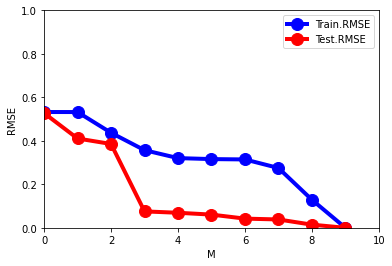

In [270]:
plt.plot( 'M', 'Train.RMSE', data=df1, marker='o', markersize=12, color='blue', linewidth=4)
plt.plot( 'M', 'Test.RMSE', data=df1, marker='o',markersize=12, color='red', linewidth=4)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('M')
plt.ylim((0,1))
plt.xlim((0,10))
plt.show()

In [271]:
np.random.seed(50)
X2 = np.random.uniform(0,1,120)
print(X2)
mean, s_d = 0, 1
N = np.random.normal(mean, s_d, 120)
print(N)
import matplotlib.pyplot as plt
y2=np.sin(2*np.pi*X2)+(0.1 * N)
print(y2)
print(X2)

[0.49460165 0.2280831  0.25547392 0.39632991 0.3773151  0.99657423
 0.4081972  0.77189399 0.76053669 0.31000935 0.3465412  0.35176482
 0.14546686 0.97266468 0.90917844 0.5599571  0.31359075 0.88820004
 0.67457307 0.39108745 0.50718412 0.5241035  0.92800093 0.57137307
 0.66833757 0.05225869 0.3270573  0.05640164 0.17982769 0.92593317
 0.93801522 0.71409271 0.73268761 0.46174768 0.93132927 0.40642024
 0.68320577 0.64991587 0.59876518 0.22203939 0.68235717 0.8780563
 0.79671726 0.43200225 0.91787822 0.78183368 0.72575028 0.12485469
 0.91630845 0.38771099 0.29492955 0.61673141 0.46784623 0.25533891
 0.83899589 0.1786192  0.22711417 0.65987645 0.47911625 0.07344734
 0.13896007 0.11230718 0.47778497 0.54029623 0.95807105 0.58379231
 0.52666409 0.92226269 0.91925702 0.25200886 0.68263261 0.96427612
 0.22696165 0.7160172  0.79776011 0.9367512  0.8537225  0.42154581
 0.00543987 0.03486533 0.01390537 0.58890993 0.3829931  0.11481895
 0.86445401 0.82165703 0.73749168 0.84034417 0.4015291  0.74862

RMSE: 0.09163503786060073
R2: 0.9821301585985651


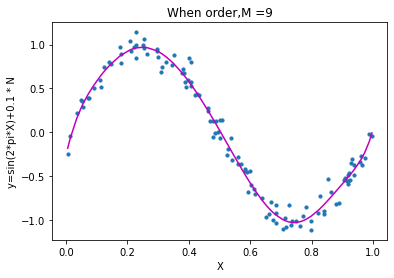

In [272]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x2_polynomial = polynomial_features.fit_transform(X2.reshape(120,1))

x2 = X2[:, np.newaxis]
y2= y2[:, np.newaxis]

model = LinearRegression()
model.fit(x2_polynomial, y2)
y2_polynomial_pred = model.predict(x2_polynomial)

rmse = np.sqrt(mean_squared_error(y2,y2_polynomial_pred))
r2 = r2_score(y2,y2_polynomial_pred)
print("RMSE:",rmse)
print("R2:",r2)

plt.scatter(x2, y2, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_polynomial_pred), key=sorted_axis)
x2, y2_polynomial_pred = zip(*sorted_zip)
plt.plot(x2, y2_polynomial_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+0.1 * N')
plt.show()

In [273]:
def regularizeRidge(alpha):
    if alpha < 0: alpha = math.exp(alpha)
    else:
        print("alpha = ",alpha)
        if alpha != 0: print("ln(alpha) = ", math.log(alpha))
    polynomial_features= PolynomialFeatures(degree=9)
    x_transformed =  polynomial_features.fit_transform(X2.reshape(120,1))
    polynomial_linear_model = Ridge(alpha = alpha)
    polynomial_linear_model.fit(x_transformed, y2)
    return polynomial_linear_model

def chartRidge(alpha):
    model = regularizeRidge(alpha)
    xx = np.linspace(0, 1, 120)
    x_transformed =polynomial_features.fit_transform(xx.reshape(120,1))
    yy = model.predict(x_transformed)
    plt.plot(xx, yy,label=alpha)
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, c = 'r')
    plt.legend()

alpha =  1
ln(alpha) =  0.0


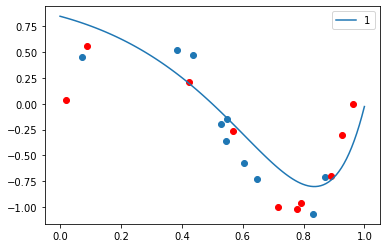

In [274]:
chartRidge(1)

alpha =  0.1
ln(alpha) =  -2.3025850929940455


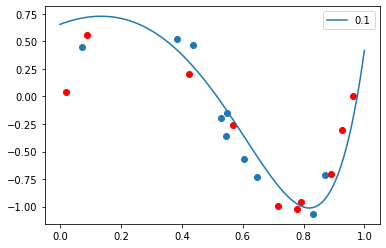

In [275]:
chartRidge(0.1)

alpha =  0.01
ln(alpha) =  -4.605170185988091


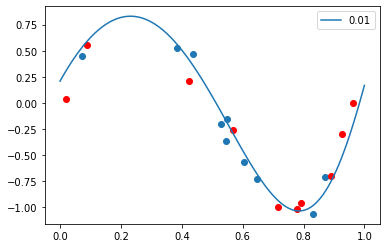

In [276]:
chartRidge(0.01)

alpha =  0.001
ln(alpha) =  -6.907755278982137


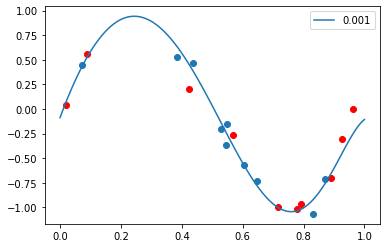

In [277]:
chartRidge(0.001)

alpha =  0.0001
ln(alpha) =  -9.210340371976182


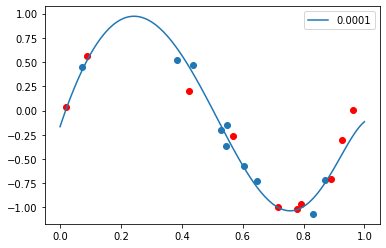

In [278]:
chartRidge(0.0001)

alpha =  1e-05
ln(alpha) =  -11.512925464970229


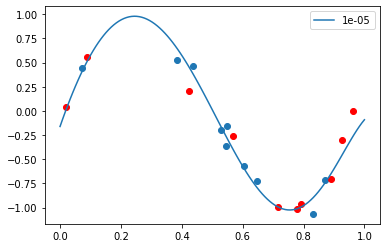

In [279]:
chartRidge(0.00001)

In [280]:
def getMse(Y, yy):
    standard = tf.square(Y - yy)
    mse = tf.reduce_mean(standard)
    return mse.numpy()


train_error = np.zeros(30)
test_error = np.zeros(30)

def getErrorRidge(i:int,  model):
    xx_transformed_test = polynomial_features.fit_transform(X_test.reshape(X_test.shape[0], 1))
    xx_transformed_train = polynomial_features.fit_transform(X_train.reshape(X_train.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)
    test_error[i] = getMse(y_test, yy_test)
    train_error[i] = getMse(y_train, yy_train)

In [281]:
xx = list(range(-30, 0))
for i in xx:
    model = regularizeRidge(i)
    getErrorRidge(i, model)

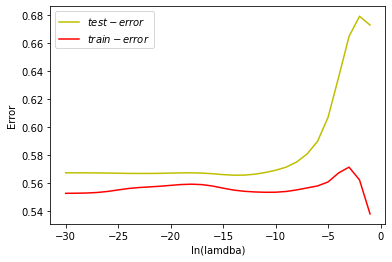

In [282]:
xx = list(range(-30, 0))
plt.plot(xx, test_error, label = "$test-error$", c = 'y')
plt.plot(xx, train_error, label = "$train-error$", c = 'r')

plt.xlabel('ln(lamdba)')

plt.ylabel('Error')
plt.legend()

In [283]:
accurate_lambda = 0
for i in range(-30,0):
    if test_error[i+30] == test_error.min(): accurate_lambda = i
print("best ln(lambda)based on my analysis = ", accurate_lambda)
accurate_lambda_0 = math.exp(accurate_lambda)
print("best lambda = ", accurate_lambda_0)
print("In Conclusion of this analysis, the model with input ln(lamdba) = ",accurate_lambda,", lambda = ",accurate_lambda_0," will provide best test performance.")

best ln(lambda)based on my analysis =  -14
best lambda =  8.315287191035679e-07
In Conclusion of this analysis, the model with input ln(lamdba) =  -14 , lambda =  8.315287191035679e-07  will provide best test performance.
